In [16]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase

In [17]:
D = dataset("datasets","faithful")
@show names(D)
D

names(D) = ["Eruptions", "Waiting"]


Row,Eruptions,Waiting
,Float64,Int64
1,3.6,79
2,1.8,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.7,88
8,3.6,85
9,1.95,51


In [18]:
describe(D)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,0,Float64
2,Waiting,70.8971,43,76.0,96,0,Int64


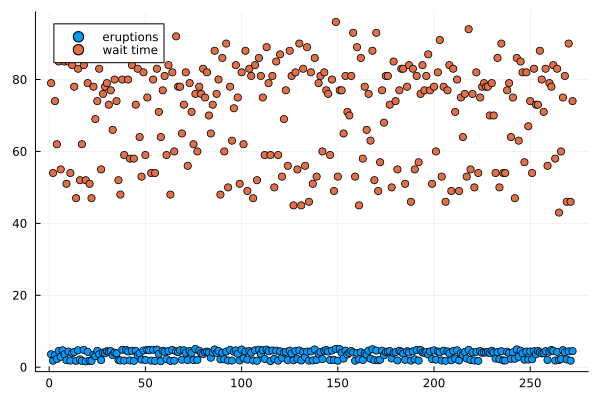

In [19]:
eruptions = D[!,:Eruptions]
scatter(eruptions,label="eruptions")
waittime = D[!,:Waiting]
scatter!(waittime,label="wait time")

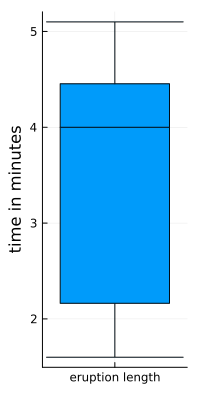

In [20]:
boxplot(["eruption length"],eruptions,legend=false,size=(200,400),whisker_width=1,ylabel="time in minutes")

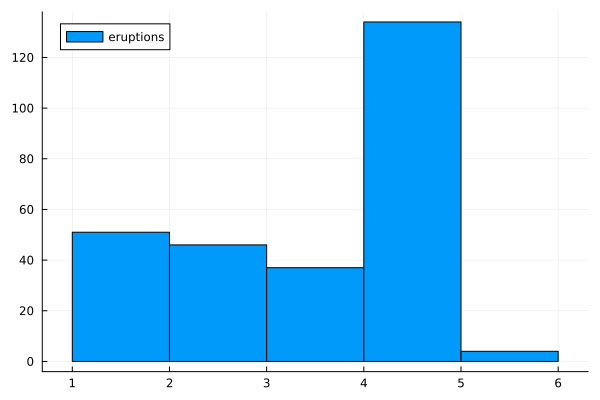

In [21]:
histogram(eruptions,label="eruptions")

Arguments

* x: AbstractVector of values to be binned
* bins: Integer, NTuple{2,Integer}, AbstractVector or Symbol. Default is :auto (the Freedman-Diaconis rule). For histogram-types, defines the approximate number of bins to aim for, or the auto-binning algorithm to use (:sturges, :sqrt, :rice, :scott or :fd For fine-grained control pass a Vector of break values, e.g. range(minimum(x), stop = maximum(x), length = 25)
* weights: Vector of weights for the values in x, for weighted bin counts
* normalize: Bool or Symbol. Histogram normalization mode. Possible values are: false/:none (no normalization, default), true/:pdf (normalize to a discrete Probability Density Function, where the total area of the bins is 1), :probability (bin heights sum to 1) and :density (the area of each bin, rather than the height, is equal to the counts - useful for uneven bin sizes).
* bar_position: Symbol. Choose from :overlay (default), :stack. (warning: May not be implemented fully)
* bar_width: nothing or Number. Width of bars in data coordinates. When nothing, chooses based on x (or y when orientation = :h).
* bar_edges: Bool. Align bars to edges (true), or centers (the default)?
* orientation: Symbol. Horizontal or vertical orientation for bar types. Values :h, :hor, :horizontal correspond to horizontal (sideways, anchored to y-axis), and :v, :vert, and :vertical correspond to vertical 

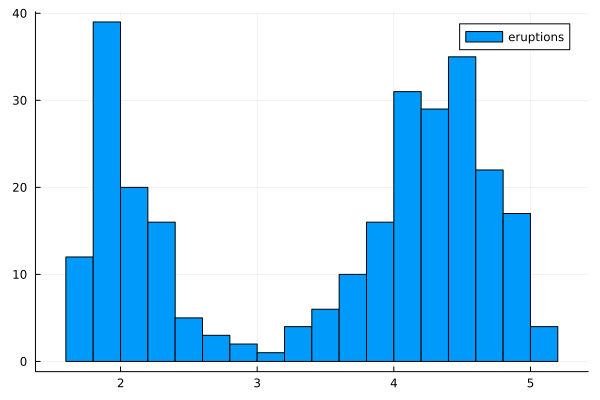

In [22]:
histogram(eruptions,bins=:sqrt,label="eruptions")

In [23]:
p=kde(eruptions)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(0.2608918621442271:0.0030181808870110138:6.439108137855772, [1.1161139442217305e-5, 1.1244427155304715e-5, 1.1344179473224414e-5, 1.146054328619861e-5, 1.1593684794655723e-5, 1.1743789689266926e-5, 1.1911063348919726e-5, 1.2095731053138326e-5, 1.2298038211913664e-5, 1.2518250611666393e-5  …  1.1215022627797389e-5, 1.113759304488017e-5, 1.1076192604056456e-5, 1.1030781609218734e-5, 1.1001338720893414e-5, 1.0987860983070058e-5, 1.0990363864678623e-5, 1.1008881316295835e-5, 1.1043465842321826e-5, 1.1094188587988663e-5])

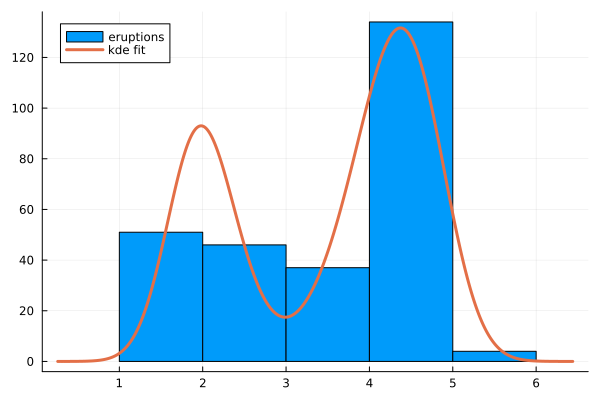

In [24]:
histogram(eruptions,label="eruptions")
plot!(p.x,p.density .* length(eruptions), linewidth=3,color=2,label="kde fit") # nb of elements*bin width

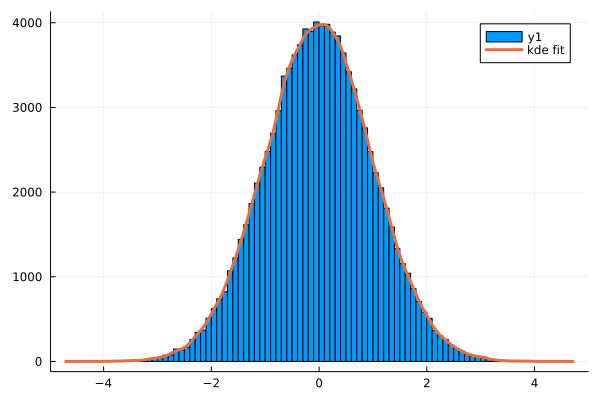

In [29]:
myrandomvector = randn(100000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

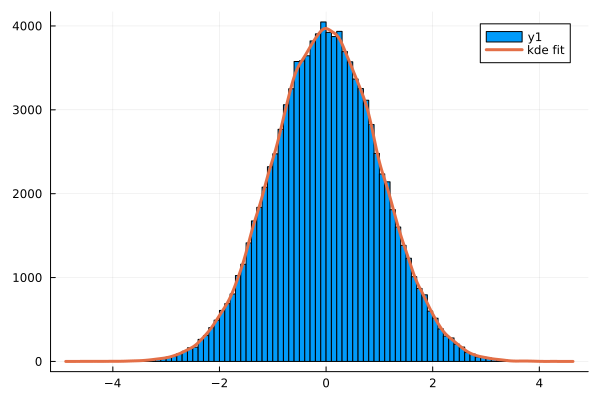

In [30]:
d = Normal()
myrandomvector = rand(d,100000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

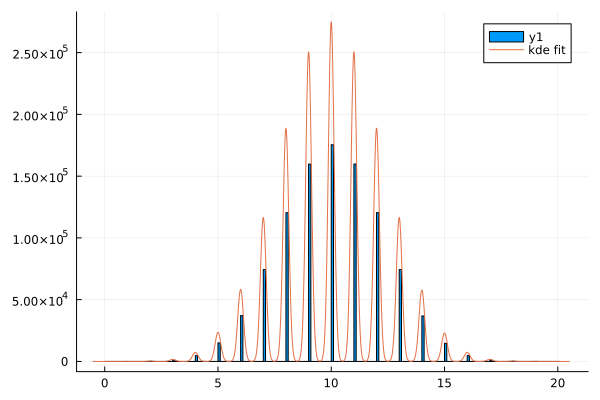

In [32]:
b = Binomial(20) 
myrandomvector = rand(b,1000000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.5,color=2,label="kde fit") # nb of elements*bin width

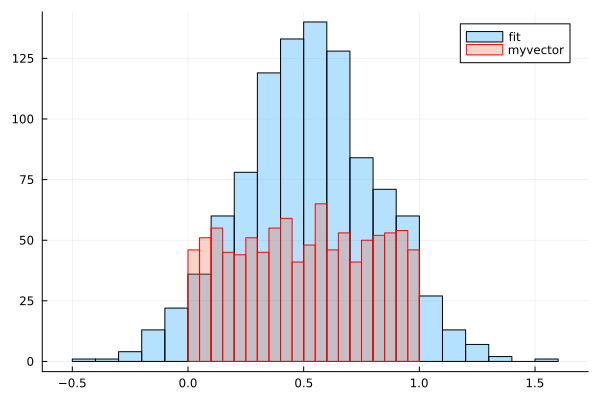

In [33]:
x = rand(1000)
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3,label="fit")
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3,label="myvector")

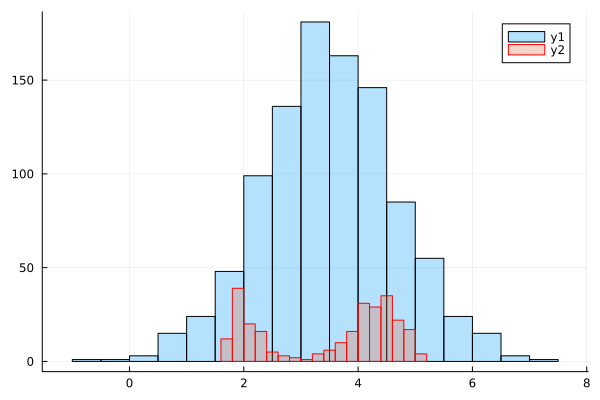

In [35]:
x = eruptions
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3)
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3)

In [38]:
myrandomvector = randn(1000)
OneSampleTTest(myrandomvector)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          -0.0389316
    95% confidence interval: (-0.09915, 0.02128)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.2048

Details:
    number of observations:   1000
    t-statistic:              -1.2687096713098378
    degrees of freedom:       999
    empirical standard error: 0.03068595757613635


In [39]:
OneSampleTTest(eruptions)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          3.48778
    95% confidence interval: (3.352, 3.624)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   272
    t-statistic:              50.39726752574924
    degrees of freedom:       271
    empirical standard error: 0.06920579744632577


In [42]:
scipy_stats = pyimport("scipy.stats")
@show scipy_stats.spearmanr(eruptions,waittime)
@show scipy_stats.pearsonr(eruptions,waittime)

scipy_stats.spearmanr(eruptions, waittime) = (0.7779720576516121, 1.9895419906561382e-56)
scipy_stats.pearsonr(eruptions, waittime) = (0.9008111683218126, 8.12995850662248e-100)


(0.9008111683218126, 8.12995850662248e-100)

In [43]:
scipy_stats.pearsonr(eruptions,waittime)

(0.9008111683218126, 8.12995850662248e-100)

In [44]:
corspearman(eruptions,waittime)

0.7779720576516121

In [45]:
cor(eruptions,waittime)

0.900811168321813

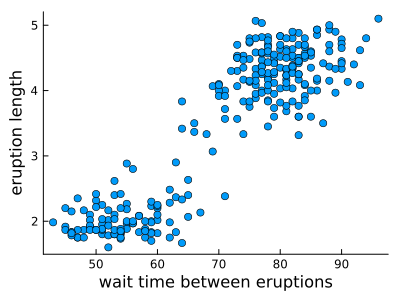

In [51]:
scatter(waittime,eruptions,ylabel="eruption length",
    xlabel="wait time between eruptions",legend=false,grid=false,size=(400,300))

In [47]:
gt = [1, 1, 1, 1, 1, 1, 1, 2]
pred = [1, 1, 2, 2, 1, 1, 1, 1]
C = confusmat(2, gt, pred)   # compute confusion matrix
C ./ sum(C, dims=2)   # normalize per class
sum(diag(C)) / length(gt)  # compute correct rate from confusion matrix
correctrate(gt, pred)
C = confusmat(2, gt, pred)  

2×2 Matrix{Int64}:
 5  2
 1  0

In [48]:
gt = [1, 1, 1, 1, 1, 1, 1, 0];
pred = [1, 1, 0, 0, 1, 1, 1, 1]
ROC = MLBase.roc(gt,pred)
recall(ROC)
precision(ROC)

0.8333333333333334